## Perceptron

In [1]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [2]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.01213503, -0.02983225,  1.04773041,  0.96273532,  0.0101815 ],
        [-0.02069612,  0.95890277,  0.00610273,  0.98921292,  0.02814499]]),
 array([[-1, -1, -1,  1, -1]]))

In [3]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [4]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [5]:
perceptrons = []
for alfa in list(np.linspace(0, 0.0025, num=100))[1:]:
    p = Adaline(x_train, d_train, x_test, d_test, alfa, 0.4, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,alfas,epoch count
0,0.000025,100.00
1,0.000051,100.00
2,0.000076,99.57
3,0.000101,78.33
4,0.000126,63.00
...,...,...
94,0.002399,100.00
95,0.002424,100.00
96,0.002449,100.00
97,0.002475,100.00


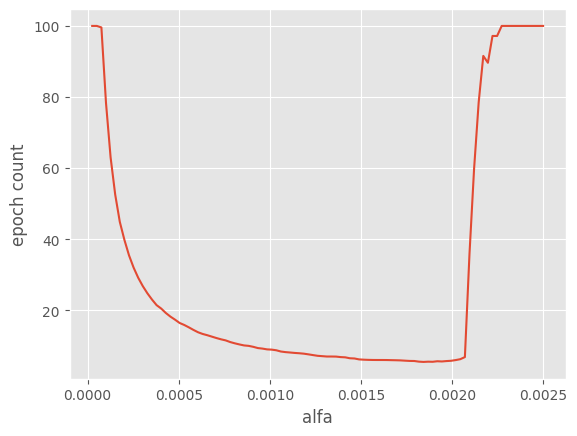

In [6]:
plt.plot([x.alfa for x in perceptrons], [x.average_epoch_count for x in perceptrons])
plt.xlabel("alfa")
plt.ylabel("epoch count")
pd.DataFrame({"alfas":[x.alfa for x in perceptrons], "epoch count":[x.average_epoch_count for x in perceptrons]})